<a href="https://colab.research.google.com/github/Janahmedtawfik/Janahmedtawfik/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
bm = pd.read_csv('Train.csv')

In [3]:
bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


categorical data:
-item_identifier -> will drop
-item_Fat_Content
-Item_Type
-Outlet_Identifier -> will drop
-Outlet_Size
-Outlet_Location_Type
-Outlet_Type


In [4]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
bm.isna().sum()/len(bm)*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [9]:
bm["Item_Weight"] = bm["Item_Weight"].fillna(bm["Item_Weight"].mean())

In [10]:
bm["Outlet_Size"] = bm["Outlet_Size"].fillna(bm["Outlet_Size"].mode()[0])

In [12]:
bm.isna().sum()/len(bm)*100

,0
Item_Identifier,0.0
Item_Weight,0.0
Item_Fat_Content,0.0
Item_Visibility,0.0
Item_Type,0.0
Item_MRP,0.0
Outlet_Identifier,0.0
Outlet_Establishment_Year,0.0
Outlet_Size,0.0
Outlet_Location_Type,0.0


In [13]:
sns.set()

<ipython-input-14-83023725236f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bm['Item_Outlet_Sales'])


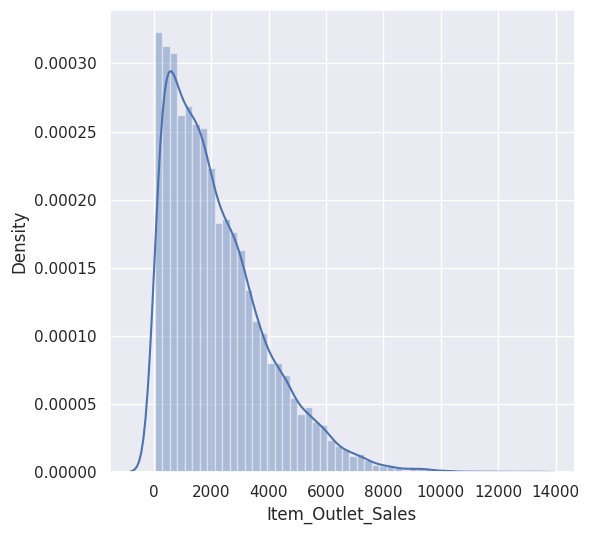

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(bm['Item_Outlet_Sales'])
plt.show()

<ipython-input-15-e0b144dcc9f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bm['Item_Weight'])


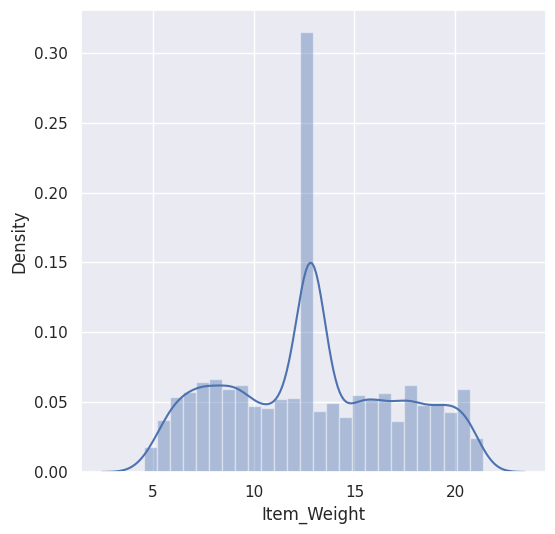

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(bm['Item_Weight'])
plt.show()

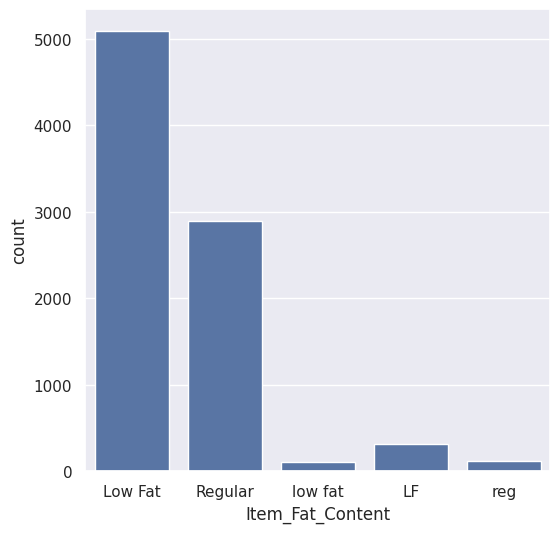

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data = bm)
plt.show()

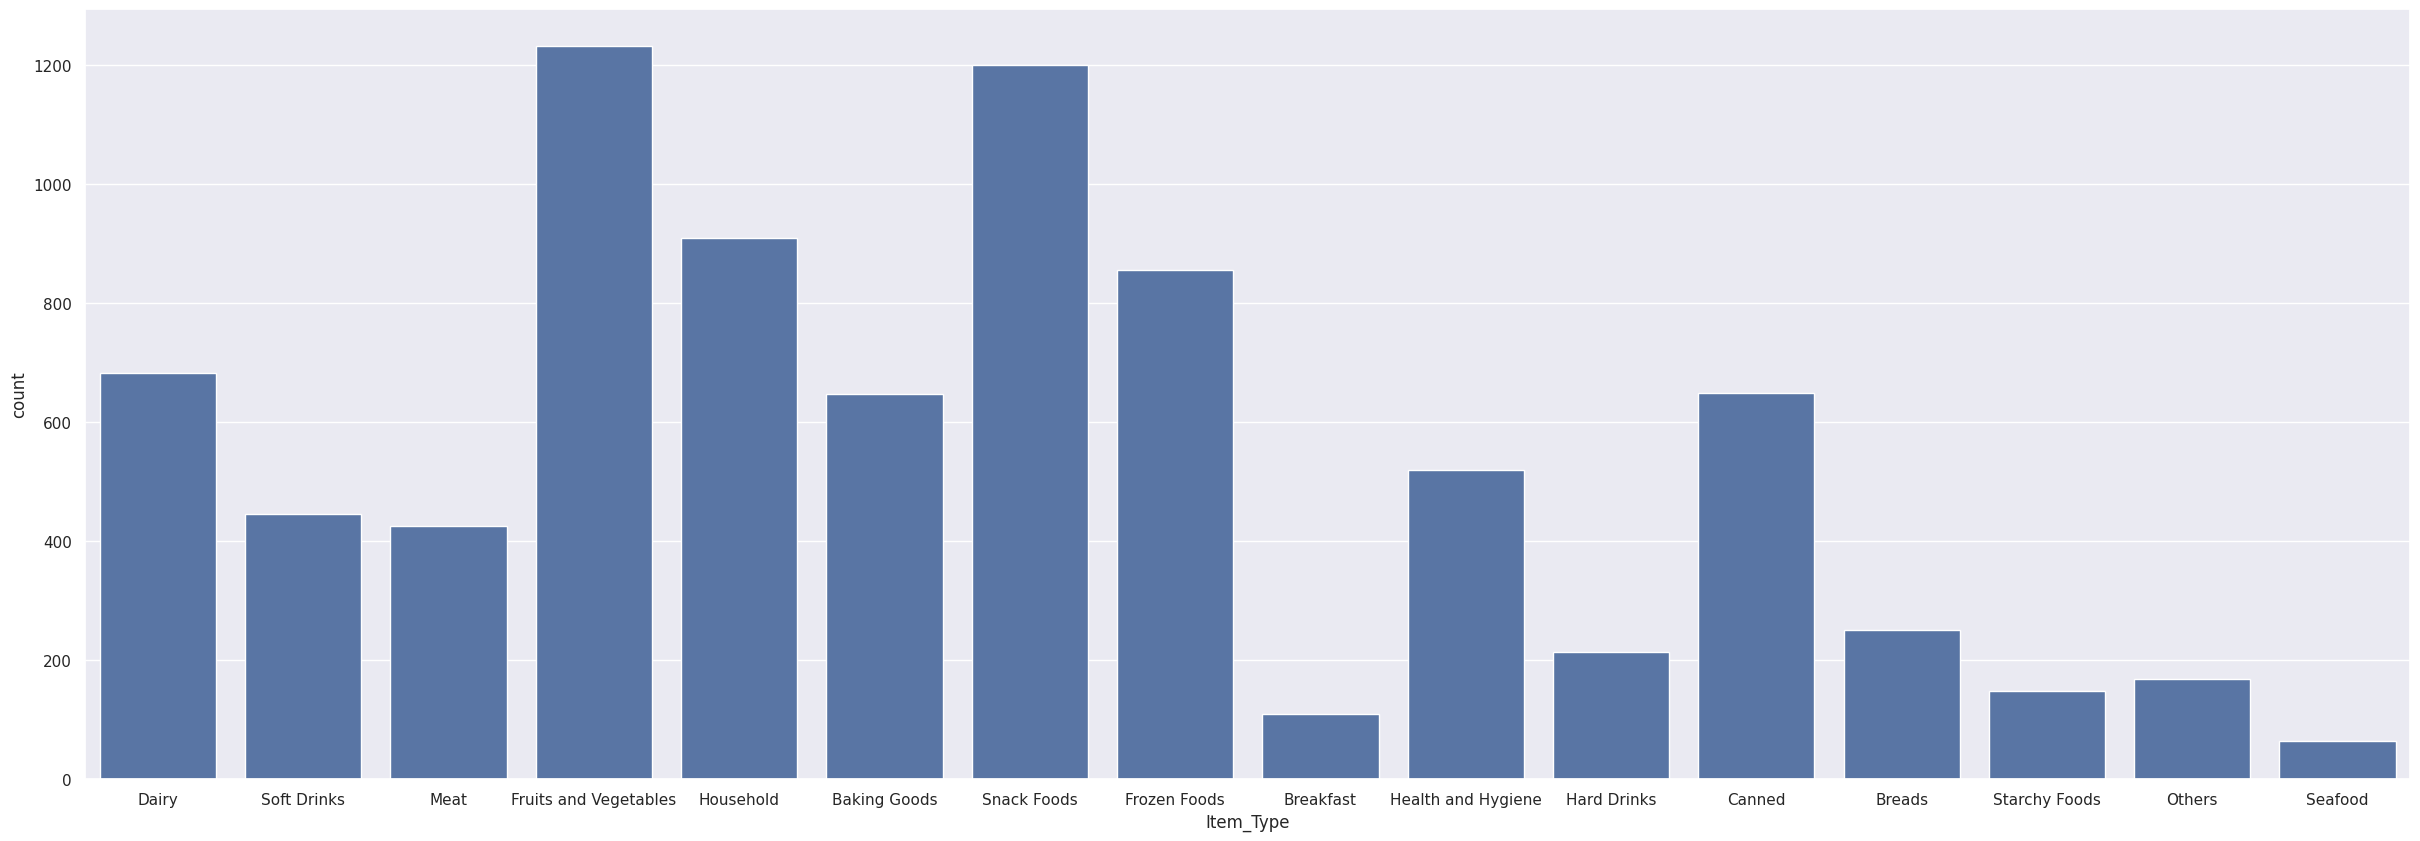

In [19]:
plt.figure(figsize=(30,10))
sns.countplot(x="Item_Type", data = bm)
plt.show()

In [21]:
bm['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [24]:
bm.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [26]:
encoder = LabelEncoder()

In [27]:
bm['Item_Identifier'] = encoder.fit_transform(bm['Item_Identifier'])
bm['Item_Fat_Content'] = encoder.fit_transform(bm['Item_Fat_Content'])
bm['Item_Type'] = encoder.fit_transform(bm['Item_Type'])
bm['Outlet_Identifier'] = encoder.fit_transform(bm['Outlet_Identifier'])
bm['Outlet_Size'] = encoder.fit_transform(bm['Outlet_Size'])
bm['Outlet_Location_Type'] = encoder.fit_transform(bm['Outlet_Location_Type'])
bm['Outlet_Type'] = encoder.fit_transform(bm['Outlet_Type']) #label encoder --> converts categorical l numerical

In [28]:
bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [29]:
x = bm.drop(columns='Item_Outlet_Sales', axis=1)
y = bm['Item_Outlet_Sales']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [31]:
model = XGBRegressor()

In [32]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(x_train)

In [40]:
r2_score = metrics.r2_score(y_train, y_pred)

In [41]:
print(r2_score)

0.8759287778441955


In [42]:
testpred = model.predict(x_test)

In [43]:
r2_testscore = metrics.r2_score(y_test, testpred)

In [45]:
print(r2_testscore) #increased around 30 percent

0.5060117482714839


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

def predict_sales():
    item_identifier = input("Enter Item Identifier: ")
    item_weight = float(input("Enter Item Weight: "))
    item_fat_content = input("Enter Item Fat Content (Low Fat or Regular): ")
    item_type = input("Enter Item Type (e.g., Fruits and Vegetables, Snack Foods): ")
    item_visibility = float(input("Enter Item Visibility: "))
    item_mrp = float(input("Enter Item MRP: "))
    outlet_identifier = input("Enter Outlet Identifier: ")
    outlet_establishment_year = int(input("Enter Outlet Establishment Year: "))
    outlet_size = input("Enter Outlet Size (e.g., Small, Medium, High): ")
    outlet_location_type = input("Enter Outlet Location Type (e.g., Tier 1, Tier 2, Tier 3): ")
    outlet_type = input("Enter Outlet Type (e.g., Supermarket Type1, Grocery Store): ")

    input_data = pd.DataFrame({
        'Item_Identifier': [item_identifier],
        'Item_Weight': [item_weight],
        'Item_Fat_Content': [item_fat_content],
        'Item_Type': [item_type],
        'Item_Visibility': [item_visibility],
        'Item_MRP': [item_mrp],
        'Outlet_Identifier': [outlet_identifier],
        'Outlet_Establishment_Year': [outlet_establishment_year],
        'Outlet_Size': [outlet_size],
        'Outlet_Location_Type': [outlet_location_type],
        'Outlet_Type': [outlet_type]
    })

    input_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

    for column in ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
        try:
            input_data[column] = encoder.transform(input_data[column])
        except ValueError as e:
            print(f"Warning: Unseen label encountered in column '{column}': {e}")
            input_data[column] = -1

    input_data_as_numpy_array = input_data.values
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    prediction = model.predict(input_data_reshaped)

    print("Predicted Item Outlet Sales:", prediction[0])

predict_sales()